In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('vdjdb_full.txt', delimiter = '\t')

C:\Users\vikra\AppData\Local\Temp\ipykernel_6520\2082842141.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('vdjdb_full.txt', delimiter = '\t')


In [3]:
df.head()

,cdr3.alpha,v.alpha,j.alpha,cdr3.beta,v.beta,d.beta,j.beta,species,mhc.a,mhc.b,...,meta.replica.id,meta.clone.id,meta.epitope.id,meta.tissue,meta.donor.MHC,meta.donor.MHC.method,meta.structure.id,cdr3fix.alpha,cdr3fix.beta,vdjdb.score
0,CIVRAPGRADMRF,TRAV26-1*01,TRAJ43*01,CASSYLPGQGDHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*02:01,HLA-A*24:02;HLA-B*08:01,HLA-B*5701...",NaN,NaN,"{""cdr3"": ""CIVRAPGRADMRF"", ""cdr3_old"": ""CIVRAPG...","{""cdr3"": ""CASSYLPGQGDHYSNQPQHF"", ""cdr3_old"": ""...",2
1,NaN,NaN,NaN,CASSFEAGQGFFSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,NaN,"{""cdr3"": ""CASSFEAGQGFFSNQPQHF"", ""cdr3_old"": ""C...",2
2,CAVPSGAGSYQLTF,TRAV20*01,TRAJ28*01,CASSFEPGQGFYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*02,HLA-A*24:02;HLA-B*08:01,HLA-B*15;HLA-...",NaN,NaN,"{""cdr3"": ""CAVPSGAGSYQLTF"", ""cdr3_old"": ""CAVPSG...","{""cdr3"": ""CASSFEPGQGFYSNQPQHF"", ""cdr3_old"": ""C...",2
3,CAVKASGSRLT,TRAV2*01,NaN,CASSYEPGQVSHYSNQPQHF,TRBV13*01,NaN,TRBJ1-5*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAVKASGSRLT"", ""cdr3_old"": ""CAVKASGSR...","{""cdr3"": ""CASSYEPGQVSHYSNQPQHF"", ""cdr3_old"": ""...",2
4,CAYRPPGTYKYIF,TRAV38-2/DV8*01,TRAJ40*01,CASSALASLNEQFF,TRBV14*01,NaN,TRBJ2-1*01,HomoSapiens,HLA-B*08,B2M,...,NaN,NaN,NaN,PBMC,"HLA-A*01:01,HLA-A*02:01;HLA-B*08:01,HLA-B*57:0...",NaN,NaN,"{""cdr3"": ""CAYRPPGTYKYIF"", ""cdr3_old"": ""CAYRPPG...","{""cdr3"": ""CASSALASLNEQFF"", ""cdr3_old"": ""CASSAL...",2


In [4]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows.shape

(1012, 34)

In [5]:
df.shape

(62177, 34)

In [6]:
df = df[df['vdjdb.score']>0]
df = df[['cdr3.alpha', 'cdr3.beta', 'v.beta', 'j.beta', 'v.alpha', 'j.alpha', 'mhc.a', 'mhc.b', 'antigen.epitope']]
df.dropna(inplace= True)
df.head().reset_index(drop=True)

,cdr3.alpha,cdr3.beta,v.beta,j.beta,v.alpha,j.alpha,mhc.a,mhc.b,antigen.epitope
0,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV26-1*01,TRAJ43*01,HLA-B*08,B2M,FLKEKGGL
1,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV20*01,TRAJ28*01,HLA-B*08,B2M,FLKEKGGL
2,CAYRPPGTYKYIF,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,TRAV38-2/DV8*01,TRAJ40*01,HLA-B*08,B2M,FLKEKGGL
3,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV26-1*01,TRAJ43*01,HLA-B*08,B2M,FLKEQGGL
4,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV20*01,TRAJ28*01,HLA-B*08,B2M,FLKEQGGL


In [7]:
df.shape

(2770, 9)

In [8]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows.shape

(732, 9)

In [59]:
df['cdr3combined'] = df['cdr3.alpha'] + df['cdr3.beta']
df.reset_index(drop=True)

,cdr3.alpha,cdr3.beta,v.beta,j.beta,v.alpha,j.alpha,mhc.a,mhc.b,antigen.epitope,cdr3combined
0,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV26-1*01,TRAJ43*01,HLA-B*08,B2M,FLKEKGGL,CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF
1,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV20*01,TRAJ28*01,HLA-B*08,B2M,FLKEKGGL,CAVPSGAGSYQLTFCASSFEPGQGFYSNQPQHF
2,CAYRPPGTYKYIF,CASSALASLNEQFF,TRBV14*01,TRBJ2-1*01,TRAV38-2/DV8*01,TRAJ40*01,HLA-B*08,B2M,FLKEKGGL,CAYRPPGTYKYIFCASSALASLNEQFF
3,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV26-1*01,TRAJ43*01,HLA-B*08,B2M,FLKEQGGL,CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF
4,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,TRBV13*01,TRBJ1-5*01,TRAV20*01,TRAJ28*01,HLA-B*08,B2M,FLKEQGGL,CAVPSGAGSYQLTFCASSFEPGQGFYSNQPQHF
...,...,...,...,...,...,...,...,...,...,...
2765,CIALNARLMF,CASSLRATDTQYF,TRBV7-2*01,TRBJ2-3*01,TRAV26-1*01,TRAJ31*01,HLA-DQA1*05:01,HLA-DQB1*02:01,PQPELPYPQPQL,CIALNARLMFCASSLRATDTQYF
2766,CAMREGRYSSASKIIF,CATSRAGGGGEKLFF,TRBV15*01,TRBJ1-4*01,TRAV14/DV4*01,TRAJ3*01,HLA-DQA1*05:01,HLA-DQB1*02:01,FPQPEQPFPWQP,CAMREGRYSSASKIIFCATSRAGGGGEKLFF
2767,CLVGDGDGGATNKLIF,CASSQGSGGNEQFF,TRBV4-3*01,TRBJ2-1*01,TRAV4*01,TRAJ32*01,HLA-DQA1*05:01,HLA-DQB1*02:01,FPQPEQPFPWQP,CLVGDGDGGATNKLIFCASSQGSGGNEQFF
2768,CAASVLYGSSNTGKLIF,CASSIVGSGGYNEQFF,TRBV19*01,TRBJ2-1*01,TRAV29/DV5*01,TRAJ37*01,HLA-DQA1*05:01,HLA-DQB1*02:01,QLQPFPQPELPY,CAASVLYGSSNTGKLIFCASSIVGSGGYNEQFF


In [64]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows.shape
#duplicate_rows.sort_values('cdr3combined').head(50)

(732, 10)

In [52]:
print(len(df['cdr3combined'].unique()))

2290


In [7]:
df.head()

,cdr3.alpha,cdr3.beta,antigen.epitope,cdr3combined
0,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,FLKEKGGL,CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF
2,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,FLKEKGGL,CAVPSGAGSYQLTFCASSFEPGQGFYSNQPQHF
3,CAVKASGSRLT,CASSYEPGQVSHYSNQPQHF,FLKEKGGL,CAVKASGSRLTCASSYEPGQVSHYSNQPQHF
4,CAYRPPGTYKYIF,CASSALASLNEQFF,FLKEKGGL,CAYRPPGTYKYIFCASSALASLNEQFF
5,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,FLKEQGGL,CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF


In [8]:
one_hot_encoded = df['cdr3combined'].str.get_dummies(sep='')

In [9]:
one_hot_encoded.reset_index(drop=True)

,A,C,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1
1,1,1,0,1,1,1,1,0,0,1,0,1,1,1,0,1,1,1,0,1
2,1,1,0,1,1,1,1,0,1,1,0,1,1,1,1,1,1,1,0,1
3,1,1,0,1,1,1,0,1,1,1,0,1,1,1,1,1,1,0,0,1
4,1,1,1,0,1,1,1,1,0,1,1,1,1,1,1,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2960,1,1,1,0,1,0,0,1,0,1,1,1,0,1,1,1,1,0,0,1
2961,1,1,0,1,1,1,0,1,1,1,1,0,0,0,1,1,1,0,0,1
2962,1,1,1,1,1,1,0,1,1,1,0,1,0,1,0,1,1,1,0,0
2963,1,1,0,1,1,1,0,1,1,1,0,1,0,1,0,1,1,1,0,1


In [12]:
df_encoded = pd.concat([df, one_hot_encoded], axis=1)
df_encoded.head()

,cdr3.alpha,cdr3.beta,antigen.epitope,cdr3combined,A,C,D,E,F,G,...,M,N,P,Q,R,S,T,V,W,Y
0,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,FLKEKGGL,CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,0,1
2,CAVPSGAGSYQLTF,CASSFEPGQGFYSNQPQHF,FLKEKGGL,CAVPSGAGSYQLTFCASSFEPGQGFYSNQPQHF,1,1,0,1,1,1,...,0,1,1,1,0,1,1,1,0,1
3,CAVKASGSRLT,CASSYEPGQVSHYSNQPQHF,FLKEKGGL,CAVKASGSRLTCASSYEPGQVSHYSNQPQHF,1,1,0,1,1,1,...,0,1,1,1,1,1,1,1,0,1
4,CAYRPPGTYKYIF,CASSALASLNEQFF,FLKEKGGL,CAYRPPGTYKYIFCASSALASLNEQFF,1,1,0,1,1,1,...,0,1,1,1,1,1,1,0,0,1
5,CIVRAPGRADMRF,CASSYLPGQGDHYSNQPQHF,FLKEQGGL,CIVRAPGRADMRFCASSYLPGQGDHYSNQPQHF,1,1,1,0,1,1,...,1,1,1,1,1,1,0,1,0,1


In [13]:
df_encoded.columns

Index(['cdr3.alpha', 'cdr3.beta', 'antigen.epitope', 'cdr3combined', 'A', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S',
       'T', 'V', 'W', 'Y'],
      dtype='object')

In [35]:
data = df_encoded[['A', 'C',
       'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S',
       'T', 'V', 'W', 'Y']]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(data)

y = df_encoded['antigen.epitope'].values
print(X.shape)
print(y.shape)

(2965, 20)
(2965,)


In [27]:
cluster_list = [2,5,10,25,50,100,150,200,250,319,400,500]
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
def cross_val_kmeans(cluster_l):
    for n in cluster_l:
        df_kmeans = df_slim.copy()
        kmeans = KMeans(n_clusters = n)
        df_kmeans['cluster'] = kmeans.fit_predict(one_hot_encoded)
        print(f"Silhouette Score - n = {n}: {silhouette_score(one_hot_encoded, kmeans.fit_predict(one_hot_encoded))}, num_clusters: {len(df_kmeans['cluster'].unique())}")
    return None

In [36]:
from sklearn.neighbors import KNeighborsClassifier
#X = one_hot_encoded
#y = df['antigen.epitope'].values

from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain,ytest = train_test_split(X,y)
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, random_state=21, shuffle=True)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
import numpy as np
max_n = 30

train_accuracies = [[] for _ in range(max_n)]
val_accuracies = [[] for _ in range(max_n)]


for n in range(max_n):

    knn = KNeighborsClassifier(n_neighbors = n+1)

    for train_index, val_index in kf.split(Xtrain):
        #Xtr, Xval = Xtrain[train_index], Xtrain[val_index]
        #ytr, yval = ytrain[train_index], ytrain[val_index]
        
        Xtr, Xval = np.array(Xtrain)[train_index], np.array(Xtrain)[val_index]
        ytr, yval = np.array(ytrain)[train_index], np.array(ytrain)[val_index]

        knn.fit(Xtr, ytr)

        
        pred_train = knn.predict(Xtr)
        pred_val = knn.predict(Xval)

        train_accuracies[n].append(accuracy_score(ytr, pred_train))
        val_accuracies[n].append(accuracy_score(yval, pred_val))

train_accuracy_mean = np.mean(train_accuracies, axis=1)
train_accuracy_stdev = np.std(train_accuracies, axis = 1)
val_accuracy_mean = np.mean(val_accuracies, axis =1)
val_accuracy_stdev = np.std(val_accuracies, axis = 1)

assert(np.shape(train_accuracy_mean)==(max_n,))
assert(np.shape(train_accuracy_stdev)==(max_n,))
assert(np.shape(val_accuracy_mean)==(max_n,))
assert(np.shape(val_accuracy_stdev)==(max_n,))

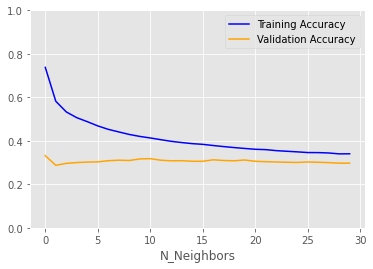

In [32]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.plot(train_accuracy_mean, color = "blue", label = "Training Accuracy")
plt.plot(val_accuracy_mean, color = "orange", label = "Validation Accuracy")
plt.xlabel("N_Neighbors")
plt.ylim(0,1)
plt.legend()

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=30)

knn.fit(Xtrain,ytrain)

ypred = knn.predict(Xtest)

In [38]:
from sklearn import metrics 

print(metrics.classification_report(ypred,ytest))

                          precision    recall  f1-score   support

               AAFKRSCLK       0.00      0.00      0.00         0
               AAGIGILTV       0.00      0.00      0.00         0
    ADSLSFFSSSIKRGGGSLVP       0.00      0.00      0.00         0
              ALDPHSGHFV       0.00      0.00      0.00         0
               ALGIGILTV       0.00      0.00      0.00         0
               ALLPGLPAA       0.00      0.00      0.00         0
               ALSPVIPHI       0.00      0.00      0.00         4
               ALWGFFPVL       0.00      0.00      0.00         0
               ALYGFVPVL       0.00      0.00      0.00         0
            APQPELPYPQPG       0.00      0.00      0.00         0
           APQPELPYPQPGS       0.00      0.00      0.00         1
           APRGPHGGAASGL       0.00      0.00      0.00         0
               ASNENMETM       0.28      0.29      0.29        31
       ATGFKQSSKALQRPVAS       0.00      0.00      0.00         0
         

C:\Users\vikra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikra\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [40]:
class BaselineClassifier:
    def __init__(self):
        self.label_probs = {}

    def fit(self, X_train, y_train):

        label_frequency = {}
        for label in y_train:
            if label in label_frequency:
                label_frequency[label] += 1
            else:
                label_frequency[label] = 1


        total_samples = len(y_train)
        for label, freq in label_frequency.items():
            self.label_probs[label] = freq / total_samples

    def predict(self, X_test):
        predictions = []
        labels = list(self.label_probs.keys())
        probs = list(self.label_probs.values())

        # Assign labels based on probabilities
        for _ in range(len(X_test)):
            sampled_label = np.random.choice(labels, p=probs)
            predictions.append(sampled_label)

        return predictions


classifier = BaselineClassifier()
classifier.fit(Xtrain, ytrain)

ypred = classifier.predict(Xtest)

In [41]:
print(metrics.classification_report(ypred,ytest))

                          precision    recall  f1-score   support

               AAFKRSCLK       0.00      0.00      0.00         1
               AAGIGILTV       0.00      0.00      0.00         1
         AALALLLLDRLNQLE       0.00      0.00      0.00         2
         AAVVRFQEAANKQKQ       0.00      0.00      0.00         1
    ADSLSFFSSSIKRGGGSLVP       0.00      0.00      0.00         0
              ALDPHSGHFV       0.00      0.00      0.00         1
               ALGIGILTV       0.00      0.00      0.00         0
               ALLPGLPAA       0.00      0.00      0.00         0
               ALSPVIPHI       0.00      0.00      0.00         2
               ALWGFFPVL       0.00      0.00      0.00         2
               ALYGFVPVL       0.00      0.00      0.00         2
             APARLERRHSA       0.00      0.00      0.00         1
            APQPELPYPQPG       0.00      0.00      0.00         0
           APRGPHGGAASGL       0.00      0.00      0.00         3
         

C:\Users\vikra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikra\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\vikra\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [43]:
print(df['antigen.epitope'].value_counts())

NLVPMVATV            461
SSYRRPVGI            261
GILGFVFTL            250
ASNENMETM            136
SSLENFRAYV           130
                    ... 
FEAQKAKANKAVDG         1
ATGFKQSSKALQRPVAS      1
MDFARVHFISALHGSG       1
ENPVVHFFKNIVTP         1
LPEPLPQGQGTAY          1
Name: antigen.epitope, Length: 391, dtype: int64


In [44]:
print(df.shape)

(2965, 4)


In [45]:
print(461/2965)

0.1554806070826307
